<a href="https://colab.research.google.com/github/githuno/LEARN-quantum/blob/main/gate3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **量子ゲート講座 第三回（エントリーコース）**
この講座では量子ゲート方式の量子コンピュータの計算について学びます。\
エントリーコースでは数式を一切使用せずに行います。量子ゲートの計算の雰囲気を味わってもらえたら幸いです。

講座数: 全3回（各講座60分）\
対象年齢: 中学生以上


### **第三回講座内容**
この講座では第一回、第二回で学習した知識をもとに色々な問題を量子ゲートを使って解いていきます。

1.   条件に合う量子ゲートを作成してみよう
2.   経路を列挙してみよう
3.   演習 & 考察


## **1. 条件に合う量子ゲートを作成してみよう**
第二回では重ね合わせの性質を用いて足し算回路の作成方法について学びました。\
この応用方法について条件に応じた組み合わせのみを出力する方法があります。

#### **条件に応じた組み合わせのみを出力**

この解決策としては条件に応じた組み合わせのみを出力する方法があります。\
先ほどの例の場合では「1+1の答えのみ」「答えが一桁になる場合のみ」「答えが二桁になる場合のみ」が出力されるような量子回路を作成することになります。

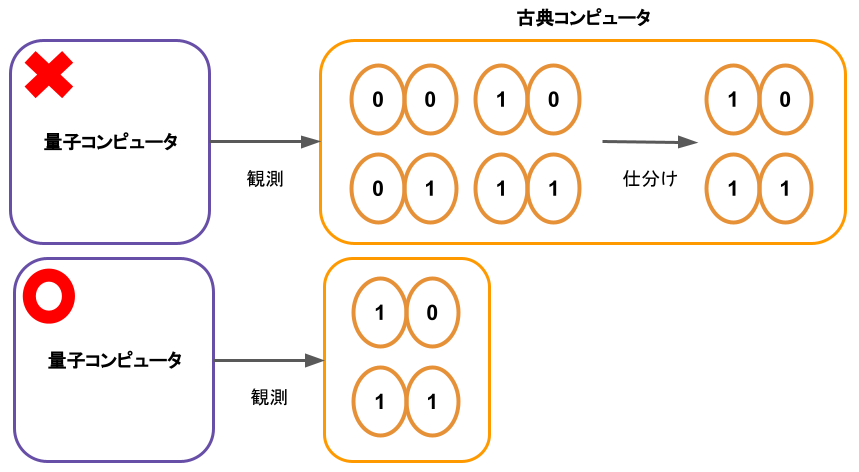

このような量子回路を作成するには条件に合致するように量子回路に "当たり" をつけて出力を絞ります。
今回はこの "当たり" をつける問題を解いてみます。

### **例題**
入力が "000" から "111" の8通りのうち、"111" のときだけ "1" を返すような回路を作成してください。

#### **概観**
この問題を考えるにあたって、まず始めに全体の量子ビット数を考える必要があります。\
ここで重要になるのは入出力の量子ビットですが、今回は入力は3ビット、出力が1ビットなので全体で4量子ビットあれば実現できそうです。

#### **入力部分**
入力が "000" から "111" の8通りの組み合わせを一度に計算を行いますので、入力の3量子ビットに Hゲートを施せば実現できそうです。

In [ ]:
# qiskitのインストール
!pip install qiskit qiskit-aer 'qiskit[visualization]'

# networkxのインストール
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=59ac0c05585cc06b5f0fb30b02cbff98145bf74ae10f55edab8a154faf

観測回数: 1000回
取得した値: 101, 取得回数: 118回, Input1: 1, Input2: 0, Input3: 1
取得した値: 100, 取得回数: 142回, Input1: 1, Input2: 0, Input3: 0
取得した値: 001, 取得回数: 137回, Input1: 0, Input2: 0, Input3: 1
取得した値: 000, 取得回数: 127回, Input1: 0, Input2: 0, Input3: 0
取得した値: 010, 取得回数: 117回, Input1: 0, Input2: 1, Input3: 0
取得した値: 011, 取得回数: 108回, Input1: 0, Input2: 1, Input3: 1
取得した値: 111, 取得回数: 120回, Input1: 1, Input2: 1, Input3: 1
取得した値: 110, 取得回数: 131回, Input1: 1, Input2: 1, Input3: 0


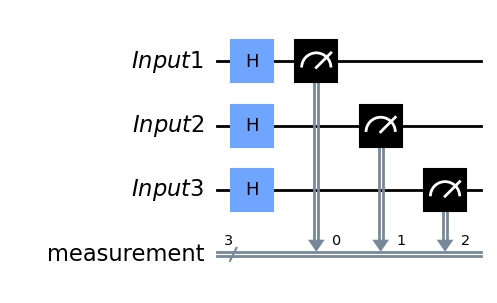

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qInput1 = QuantumRegister(1, name="Input1")
qInput2 = QuantumRegister(1, name="Input2")
qInput3 = QuantumRegister(1, name="Input3")
c = ClassicalRegister(3, name="measurement")
qc = QuantumCircuit(qInput1, qInput2, qInput3, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2], [0, 1, 2])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: {k[::-1]}, 取得回数: {v}回, Input1: {k[::-1][0]}, Input2: {k[::-1][1]}, Input3: {k[::-1][2]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", fold=-1)

取得した値から分かる通り "000" から "111" の8通りを出力することができました。

#### **出力部分**
入力の3量子ビットに加えて出力用に1量子ビット加えます。

観測回数: 1000回
取得した値: 0010, 取得回数: 121回, Input1: 0, Input2: 0, Input3: 1, Output: 0
取得した値: 1010, 取得回数: 132回, Input1: 1, Input2: 0, Input3: 1, Output: 0
取得した値: 1000, 取得回数: 115回, Input1: 1, Input2: 0, Input3: 0, Output: 0
取得した値: 0110, 取得回数: 143回, Input1: 0, Input2: 1, Input3: 1, Output: 0
取得した値: 1100, 取得回数: 124回, Input1: 1, Input2: 1, Input3: 0, Output: 0
取得した値: 1110, 取得回数: 127回, Input1: 1, Input2: 1, Input3: 1, Output: 0
取得した値: 0100, 取得回数: 124回, Input1: 0, Input2: 1, Input3: 0, Output: 0
取得した値: 0000, 取得回数: 114回, Input1: 0, Input2: 0, Input3: 0, Output: 0


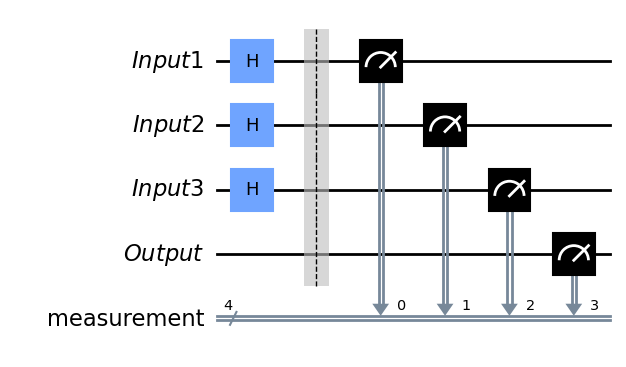

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qInput1 = QuantumRegister(1, name="Input1")
qInput2 = QuantumRegister(1, name="Input2")
qInput3 = QuantumRegister(1, name="Input3")
qoutput = QuantumRegister(1, name="Output")
c = ClassicalRegister(4, name="measurement")
qc = QuantumCircuit(qInput1, qInput2, qInput3, qoutput, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: {k[::-1]}, 取得回数: {v}回, Input1: {k[::-1][0]}, Input2: {k[::-1][1]}, Input3: {k[::-1][2]}, Output: {k[::-1][3]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", fold=-1)

回路図から分かる通り、出力用の量子ビット（Output）を一つ加えました。\
出力用の量子ビットにはまだ何も量子ビットゲートを施していないので、取得した値は全て "0" になります。\
ここに入力用の量子ビットと出力用の量子ビットに何らかの量子ビットゲートを施して、入力が "111" のときのみ出力が "1" になるようにします。

試しに適当に量子ビットゲートを置いてみます。

観測回数: 1000回
取得した値: 0110, 取得回数: 137回, Input1: 0, Input2: 1, Input3: 1, Output: 0
取得した値: 0000, 取得回数: 120回, Input1: 0, Input2: 0, Input3: 0, Output: 0
取得した値: 0100, 取得回数: 115回, Input1: 0, Input2: 1, Input3: 0, Output: 0
取得した値: 1010, 取得回数: 127回, Input1: 1, Input2: 0, Input3: 1, Output: 0
取得した値: 0010, 取得回数: 139回, Input1: 0, Input2: 0, Input3: 1, Output: 0
取得した値: 1101, 取得回数: 132回, Input1: 1, Input2: 1, Input3: 0, Output: 1
取得した値: 1111, 取得回数: 113回, Input1: 1, Input2: 1, Input3: 1, Output: 1
取得した値: 1000, 取得回数: 117回, Input1: 1, Input2: 0, Input3: 0, Output: 0


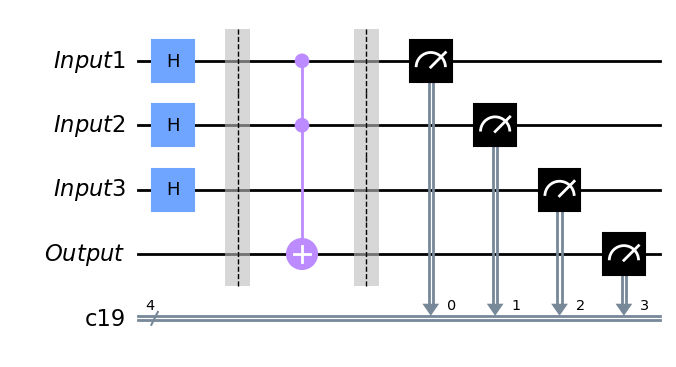

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qInput1 = QuantumRegister(1, name="Input1")
qInput2 = QuantumRegister(1, name="Input2")
qInput3 = QuantumRegister(1, name="Input3")
qoutput = QuantumRegister(1, name="Output")
c = ClassicalRegister(4)
qc = QuantumCircuit(qInput1, qInput2, qInput3, qoutput, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()
qc.ccx(0, 1, 3)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: {k[::-1]}, 取得回数: {v}回, Input1: {k[::-1][0]}, Input2: {k[::-1][1]}, Input3: {k[::-1][2]}, Output: {k[::-1][3]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", fold=-1)

取得した値から入力が "111" のときに出力を "1" にすることができました。一方で入力が "110" のときも出力が "1" になっています。\
したがって、よりうまく量子ビットゲートを施して、入力が "111" のときのみ出力が "1" になるようにしなければなりません。

#### **補助量子ビット**
先ほどのように、量子回路を作成していくのですが何かしら思い付かない限り、問題によってはかなり難しいです。\
これを解決するために**補助量子ビット（アンシラビット、Ancilla）**を導入します。

補助量子ビットはその名の通り、計算の補助を行う量子ビットのことです。\
実装は簡単で通常の回路に余分に量子ビットを増やして、それを補助量子ビットとします。\
補助量子ビットを用いることで一時的な計算結果を保持することができます。

補助量子ビットを1つ使う場合は以下のような量子回路になります。

観測回数: 1000回
取得した値: 10000, 取得回数: 116回, C1: 1, C2: 0, C3: 0, Ancilla: 0, Answer: 0
取得した値: 00100, 取得回数: 122回, C1: 0, C2: 0, C3: 1, Ancilla: 0, Answer: 0
取得した値: 11100, 取得回数: 123回, C1: 1, C2: 1, C3: 1, Ancilla: 0, Answer: 0
取得した値: 11000, 取得回数: 117回, C1: 1, C2: 1, C3: 0, Ancilla: 0, Answer: 0
取得した値: 01000, 取得回数: 127回, C1: 0, C2: 1, C3: 0, Ancilla: 0, Answer: 0
取得した値: 00000, 取得回数: 143回, C1: 0, C2: 0, C3: 0, Ancilla: 0, Answer: 0
取得した値: 01100, 取得回数: 134回, C1: 0, C2: 1, C3: 1, Ancilla: 0, Answer: 0
取得した値: 10100, 取得回数: 118回, C1: 1, C2: 0, C3: 1, Ancilla: 0, Answer: 0


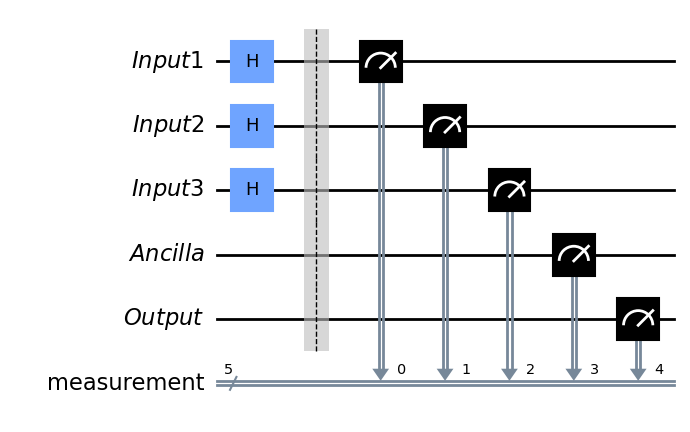

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qInput1 = QuantumRegister(1, name="Input1")
qInput2 = QuantumRegister(1, name="Input2")
qInput3 = QuantumRegister(1, name="Input3")
qAnc = AncillaRegister(1, name="Ancilla")
qOutput = QuantumRegister(1, name="Output")
c = ClassicalRegister(5, name="measurement")
qc = QuantumCircuit(qInput1, qInput2, qInput3, qAnc, qOutput, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: {k[::-1]}, 取得回数: {v}回, C1: {k[::-1][0]}, C2: {k[::-1][1]}, C3: {k[::-1][2]}, Ancilla: {k[::-1][3]}, Answer: {k[::-1][4]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", fold=-1)

デバイスが許す限り、補助量子ビットはいくらでも増やすことが可能です。

#### **例題の解法**
入出力の部分と補助量子ビットを1つ用いることで今回の回路は実現できます。\
入力の状態が "11" の場合に "1" を出力させることは CCXゲートで実現することができます。\
これを応用して、"111" を2回に分けて判定を行います。

1. 入力部分の始めの2量子ビットが "11" か否かを判定して補助量子ビットに格納する。
2. 入力部分の最後の1量子ビットと補助量子ビットが "11" か否かを判定して出力部分に格納する。

上の流れで実装を行うと、入力部分が "111" のときのみ出力部分が "1" になることがわかります。

観測回数: 1000回
取得した値: 11010, 取得回数: 123回, C1: 1, C2: 1, C3: 0, Ancilla: 1, Answer: 0
取得した値: 01100, 取得回数: 111回, C1: 0, C2: 1, C3: 1, Ancilla: 0, Answer: 0
取得した値: 10100, 取得回数: 127回, C1: 1, C2: 0, C3: 1, Ancilla: 0, Answer: 0
取得した値: 11111, 取得回数: 130回, C1: 1, C2: 1, C3: 1, Ancilla: 1, Answer: 1
取得した値: 00100, 取得回数: 134回, C1: 0, C2: 0, C3: 1, Ancilla: 0, Answer: 0
取得した値: 00000, 取得回数: 126回, C1: 0, C2: 0, C3: 0, Ancilla: 0, Answer: 0
取得した値: 01000, 取得回数: 123回, C1: 0, C2: 1, C3: 0, Ancilla: 0, Answer: 0
取得した値: 10000, 取得回数: 126回, C1: 1, C2: 0, C3: 0, Ancilla: 0, Answer: 0


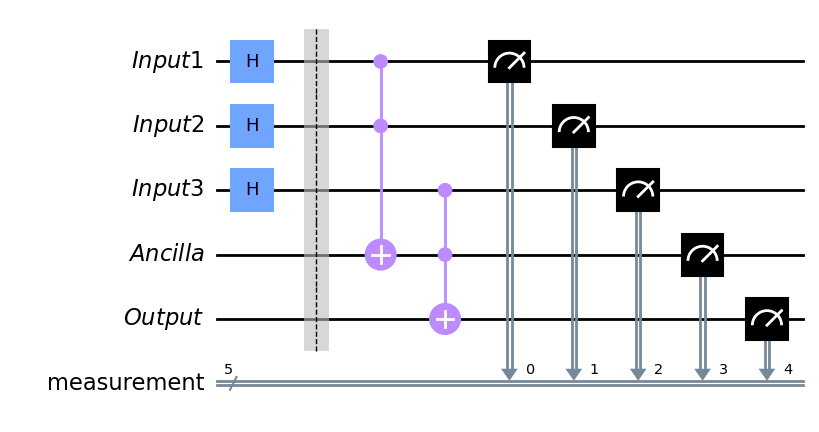

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qInput1 = QuantumRegister(1, name="Input1")
qInput2 = QuantumRegister(1, name="Input2")
qInput3 = QuantumRegister(1, name="Input3")
qAnc = AncillaRegister(1, name="Ancilla")
qOutput = QuantumRegister(1, name="Output")
c = ClassicalRegister(5, name="measurement")
qc = QuantumCircuit(qInput1, qInput2, qInput3, qAnc, qOutput, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()
qc.ccx(0, 1, 3)
qc.ccx(2, 3, 4)


# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
shots = 10000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: {k[::-1]}, 取得回数: {v}回, C1: {k[::-1][0]}, C2: {k[::-1][1]}, C3: {k[::-1][2]}, Ancilla: {k[::-1][3]}, Answer: {k[::-1][4]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", fold=-1)

結果から入力部分が "111" のときのみ出力部分が "1" になるような量子回路を作成することができました。

## **2. 地図の経路を全て列挙してみよう。**
今までの量子回路は単に計算の方法について説明を行っていきましたが、ここでは現実問題により近い問題を解いてみます。\
今回は以下の簡単なグラフデータをもとにスタートからゴールまでの経路を全て列挙することを考えます。

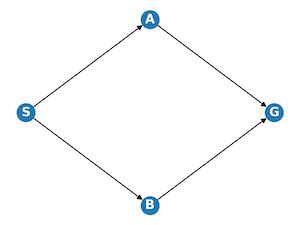

グラフのSがスタート地点、Gをゴール地点として、SからGに行く経路を量子計算を用いて全て列挙してみます。\
答えは明らかですが、S → A → G と S → B → G の2通りあります。

#### **概観**
この問題を考えるにあたって、考えることが以下の3点あります。

*   どのようにグラフデータを量子回路に埋め込むか
*   経路を量子回路でどのように表現するか
*   出力結果をどのように表現するか

先ほどの問題と同じように全体の量子ビット数を考えるためには上の3点を解決する必要があります。\
それぞれ解説していきます。

#### **どのようにグラフデータを量子回路に埋め込むか**
ここでは入力部分を考えます。一般的に量子コンピュータでデータを扱う（埋め込む）方法に関しては、\
量子コンピュータならではの特別な方法がありますが、必ずしもそれだけではありません。

通常の古典コンピュータで考える場合と同じように扱うことでうまくデータを埋め込むことができます。\
今回は後者の方法でグラフデータを量子回路に埋め込みます。

グラフデータのような地図データはざっくり考えると**点と線の集合体**だと見ることができます。\
ちなみに今回は点が S, A, B, Gの4つ、線が S→A, S→B, A→G, B→Gの4本あります。\
これらの8つの情報を量子回路に埋め込みます。今回は単純に8量子ビットを用意して、それぞれに対応付けます。

観測回数: 1000回
取得した値: '00000000', 取得回数: 1000回, S->A: 0, S->B: 0, A->G: 0, B->G: 0, S: 0, A: 0, B: 0, G: 0


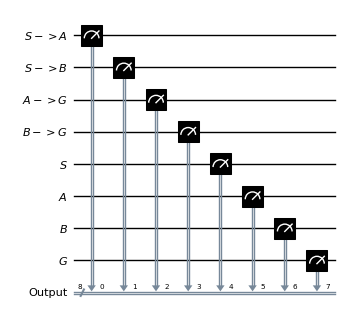

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qSA = QuantumRegister(1, name="S->A")
qSB = QuantumRegister(1, name="S->B")
qAG = QuantumRegister(1, name="A->G")
qBG = QuantumRegister(1, name="B->G")
qS = QuantumRegister(1, name="S")
qA = QuantumRegister(1, name="A")
qB = QuantumRegister(1, name="B")
qG = QuantumRegister(1, name="G")
c = ClassicalRegister(8, name="Output")
qc = QuantumCircuit(qSA, qSB, qAG, qBG, qS, qA, qB, qG, c)

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: '{k[::-1]}', 取得回数: {v}回, S->A: {k[::-1][0]}, S->B: {k[::-1][1]}, A->G: {k[::-1][2]}, B->G: {k[::-1][3]}, S: {k[::-1][4]}, A: {k[::-1][5]}, B: {k[::-1][6]}, G: {k[::-1][7]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", scale=0.5, fold=-1)

グラフデータの各情報を埋め込むための量子ビットを用意することができました。

#### **経路を量子回路でどのように表現するか**
先ほど用意した量子ビットを用いて経路を表現してみます。\
例えば S → A → G の場合の経路を見てみます。

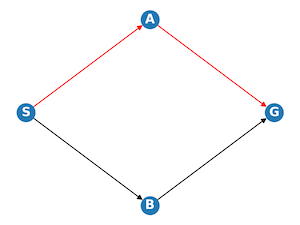

これは S → A の線と A → G の2つの線から構成されていることがわかります。\
逆に S → B の線と B → G の２つの線はこの経路では使われません。

このように使う線を "1"、使わない線を "0" と表現をすることで各経路を埋め込むことができます。\
今回はグラフデータに線が4本あるので、それぞれの線を使うか否かを考えます。\
これは第二回の講座や先ほどの問題と同様に重ね合わせの性質を用いて表現することができます。

In [ ]:
# qiskitのインストール
!pip install qiskit qiskit-aer 'qiskit[visualization]'

観測回数: 1000回
取得した値: '01110000', 取得回数: 50回, S->A: 0, S->B: 1, A->G: 1, B->G: 1, S: 0, A: 0, B: 0, G: 0
取得した値: '10000000', 取得回数: 63回, S->A: 1, S->B: 0, A->G: 0, B->G: 0, S: 0, A: 0, B: 0, G: 0
取得した値: '11110000', 取得回数: 53回, S->A: 1, S->B: 1, A->G: 1, B->G: 1, S: 0, A: 0, B: 0, G: 0
取得した値: '00000000', 取得回数: 65回, S->A: 0, S->B: 0, A->G: 0, B->G: 0, S: 0, A: 0, B: 0, G: 0
取得した値: '01000000', 取得回数: 58回, S->A: 0, S->B: 1, A->G: 0, B->G: 0, S: 0, A: 0, B: 0, G: 0
取得した値: '10110000', 取得回数: 62回, S->A: 1, S->B: 0, A->G: 1, B->G: 1, S: 0, A: 0, B: 0, G: 0
取得した値: '00100000', 取得回数: 61回, S->A: 0, S->B: 0, A->G: 1, B->G: 0, S: 0, A: 0, B: 0, G: 0
取得した値: '10010000', 取得回数: 57回, S->A: 1, S->B: 0, A->G: 0, B->G: 1, S: 0, A: 0, B: 0, G: 0
取得した値: '10100000', 取得回数: 65回, S->A: 1, S->B: 0, A->G: 1, B->G: 0, S: 0, A: 0, B: 0, G: 0
取得した値: '00110000', 取得回数: 62回, S->A: 0, S->B: 0, A->G: 1, B->G: 1, S: 0, A: 0, B: 0, G: 0
取得した値: '01100000', 取得回数: 75回, S->A: 0, S->B: 1, A->G: 1, B->G: 0, S: 0, A: 0, B: 0, G: 0
取得した値: '0

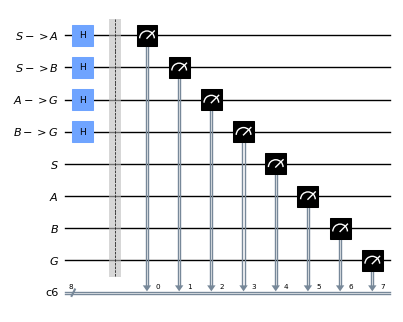

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qSA = QuantumRegister(1, name="S->A")
qSB = QuantumRegister(1, name="S->B")
qAG = QuantumRegister(1, name="A->G")
qBG = QuantumRegister(1, name="B->G")
qS = QuantumRegister(1, name="S")
qA = QuantumRegister(1, name="A")
qB = QuantumRegister(1, name="B")
qG = QuantumRegister(1, name="G")
c = ClassicalRegister(8)
qc = QuantumCircuit(qSA, qSB, qAG, qBG, qS, qA, qB, qG, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: '{k[::-1]}', 取得回数: {v}回, S->A: {k[::-1][0]}, S->B: {k[::-1][1]}, A->G: {k[::-1][2]}, B->G: {k[::-1][3]}, S: {k[::-1][4]}, A: {k[::-1][5]}, B: {k[::-1][6]}, G: {k[::-1][7]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", scale=0.5, fold=-1)

16通りの各線を使うか否かを考えた組み合わせを出力することができました。\
この組み合わせの中には求めたい経路の場合も含まれていることがわかります。

#### **出力結果をどのように表現するか**
各線を使うか否かを考えた組み合わせを出力することはできましたが、求めたい経路のみを絞ることは現状できません。\
始めの問題のように求めたい経路に何かしらの "当たり" をつける必要があります。

"当たり" をつけるためには条件を考えなければなりませんが、経路の条件とは何でしょう。\
先ほどの S → A → G の場合の経路を見てみます。

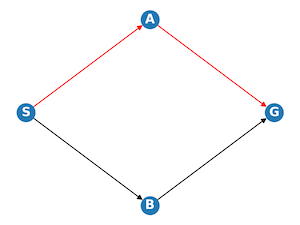

この経路で使われる S → A の線と A → G の2つの線は点Aで繋がっています。\
また、SからGへの経路なので、必ずSとGは通る必要があります。

これらのもとに以下の2つの条件を満たす場合に経路ということができます。

1.   各経路はS, Gを通る。
2.   各経路は一本の線で表現できる。

また、これらの条件は以下のように言い換えることもできます。

1.   S, Gからは1本ずつ線が引かれる。
2.   A, Bに入ってくる線の本数と出ていく本数は同じ数である必要がある。

2番目の条件はA, Bに入ってくる場合は必ずA, Bそれぞれから出ていく必要があることを述べています。

以上のことを量子回路で表現してみます。\
今回の2つの条件は各点 S, A, B, G 毎に与えられています。

*    Sは1本線が引かれる。
*    Aに入ってくる線がある場合は出ていく線が必要である。
*    Bに入ってくる線がある場合は出ていく線が必要である。
*    Gは1本線が引かれる。

これらの各点の条件を満たす場合は "1"、そうでない場合は "0" を返すようにします。\
Sの条件は S → A, S → B のどちらかが "1" になればいいので、以下の表で表現できます。

| S → A | S → B | 条件に合致している |
| :-: | :-: | :-: |
| 1 | 1 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 0 | 0 | 0 |

同様にGの条件は A → G, B → G のどちらかが "1" になればいいので、以下の表で表現できます。

| A → G | B → G | 条件に合致している |
| :-: | :-: | :-: |
| 1 | 1 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 0 | 0 | 0 |

これは2つのCXゲートで表現できます。

観測回数: 1000回
取得した値: '011', 取得回数: 252回, S->A: 0, S->B: 1, S: 1
取得した値: '110', 取得回数: 244回, S->A: 1, S->B: 1, S: 0
取得した値: '101', 取得回数: 253回, S->A: 1, S->B: 0, S: 1
取得した値: '000', 取得回数: 251回, S->A: 0, S->B: 0, S: 0


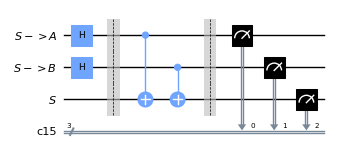

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qSA = QuantumRegister(1, name="S->A")
qSB = QuantumRegister(1, name="S->B")
qS = QuantumRegister(1, name="S")
c = ClassicalRegister(3)
qc = QuantumCircuit(qSA, qSB, qS, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)

# nodeS
qc.barrier()
qc.cx(0, 2)
qc.cx(1, 2)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2], [0, 1, 2])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: '{k[::-1]}', 取得回数: {v}回, S->A: {k[::-1][0]}, S->B: {k[::-1][1]}, S: {k[::-1][2]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", scale=0.5, fold=-1)

先ほどの表と同じ結果が得られました。

次にAの条件を考えます。Aの条件は S → A, A → G の両方が "1" もしくは "0" になればいいので、以下の表で表現できます。

| S → A | A → G | 条件に合致している |
| :-: | :-: | :-: |
| 1 | 1 | 1 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 0 | 0 | 1 |

同様にBの条件は S → B, B → G の両方が "1" もしくは "0" になればいいので、以下の表で表現できます。

| S → B | B → G | 条件に合致している |
| :-: | :-: | :-: |
| 1 | 1 | 1 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 0 | 0 | 1 |

これはA, Gの結果と逆になることがわかります。\
つまりA, Gの回路にXゲートを施せば実現できます。

観測回数: 1000回
取得した値: '001', 取得回数: 221回, S->A: 0, A->G: 0, A: 1
取得した値: '010', 取得回数: 261回, S->A: 0, A->G: 1, A: 0
取得した値: '111', 取得回数: 242回, S->A: 1, A->G: 1, A: 1
取得した値: '100', 取得回数: 276回, S->A: 1, A->G: 0, A: 0


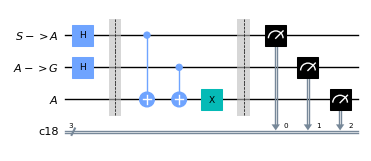

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qSA = QuantumRegister(1, name="S->A")
qAG = QuantumRegister(1, name="A->G")
qA = QuantumRegister(1, name="A")
c = ClassicalRegister(3)
qc = QuantumCircuit(qSA, qAG, qA, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)

# nodeA
qc.barrier()
qc.cx(0, 2)
qc.cx(1, 2)
qc.x(2)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2], [0, 1, 2])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: '{k[::-1]}', 取得回数: {v}回, S->A: {k[::-1][0]}, A->G: {k[::-1][1]}, A: {k[::-1][2]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", scale=0.5, fold=-1)

先ほどの表と同じ結果が得られました。

#### **最終的に完成した回路**
今までに得られた4つの条件を実装する量子回路をもとに全体の量子回路を作成します。

観測回数: 1000回
取得した値: '00010101', 取得回数: 65回, S->A: 0, S->B: 0, A->G: 0, B->G: 1, S: 0, A: 1, B: 0, G: 1
取得した値: '01111010', 取得回数: 70回, S->A: 0, S->B: 1, A->G: 1, B->G: 1, S: 1, A: 0, B: 1, G: 0
◯  取得した値: '01011111', 取得回数: 58回, S->A: 0, S->B: 1, A->G: 0, B->G: 1, S: 1, A: 1, B: 1, G: 1
取得した値: '01001100', 取得回数: 59回, S->A: 0, S->B: 1, A->G: 0, B->G: 0, S: 1, A: 1, B: 0, G: 0
取得した値: '10001010', 取得回数: 65回, S->A: 1, S->B: 0, A->G: 0, B->G: 0, S: 1, A: 0, B: 1, G: 0
取得した値: '00100011', 取得回数: 66回, S->A: 0, S->B: 0, A->G: 1, B->G: 0, S: 0, A: 0, B: 1, G: 1
取得した値: '00110000', 取得回数: 50回, S->A: 0, S->B: 0, A->G: 1, B->G: 1, S: 0, A: 0, B: 0, G: 0
取得した値: '01101001', 取得回数: 65回, S->A: 0, S->B: 1, A->G: 1, B->G: 0, S: 1, A: 0, B: 0, G: 1
取得した値: '11000000', 取得回数: 65回, S->A: 1, S->B: 1, A->G: 0, B->G: 0, S: 0, A: 0, B: 0, G: 0
取得した値: '11010011', 取得回数: 55回, S->A: 1, S->B: 1, A->G: 0, B->G: 1, S: 0, A: 0, B: 1, G: 1
◯  取得した値: '10101111', 取得回数: 62回, S->A: 1, S->B: 0, A->G: 1, B->G: 0, S: 1, A: 1, B: 1, G: 1
取得し

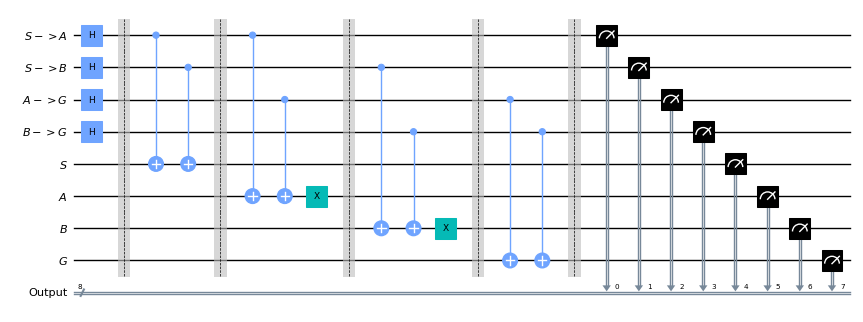

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qSA = QuantumRegister(1, name="S->A")
qSB = QuantumRegister(1, name="S->B")
qAG = QuantumRegister(1, name="A->G")
qBG = QuantumRegister(1, name="B->G")
qS = QuantumRegister(1, name="S")
qA = QuantumRegister(1, name="A")
qB = QuantumRegister(1, name="B")
qG = QuantumRegister(1, name="G")
c = ClassicalRegister(8, name="Output")
qc = QuantumCircuit(qSA, qSB, qAG, qBG, qS, qA, qB, qG, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

# nodeS
qc.barrier()
qc.cx(0, 4)
qc.cx(1, 4)

# nodeA
qc.barrier()
qc.cx(0, 5)
qc.cx(2, 5)
qc.x(5)

# nodeB
qc.barrier()
qc.cx(1, 6)
qc.cx(3, 6)
qc.x(6)

# nodeG
qc.barrier()
qc.cx(2, 7)
qc.cx(3, 7)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    if k[::-1][4:] == '1111':
        print(f"◯  取得した値: '{k[::-1]}', 取得回数: {v}回, S->A: {k[::-1][0]}, S->B: {k[::-1][1]}, A->G: {k[::-1][2]}, B->G: {k[::-1][3]}, S: {k[::-1][4]}, A: {k[::-1][5]}, B: {k[::-1][6]}, G: {k[::-1][7]}")
    else:
        print(f"取得した値: '{k[::-1]}', 取得回数: {v}回, S->A: {k[::-1][0]}, S->B: {k[::-1][1]}, A->G: {k[::-1][2]}, B->G: {k[::-1][3]}, S: {k[::-1][4]}, A: {k[::-1][5]}, B: {k[::-1][6]}, G: {k[::-1][7]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", scale=0.5, fold=-1)

4つの条件が全て "1" の場合に経路が出力されていることがわかります。\
以上でグラフデータの経路を求めることができました。

## **3. 演習・考察**
ここでは今までの内容をもとに演習を行なっていきます。

### **演習1**
以下のグラフデータの経路を列挙してみよう。

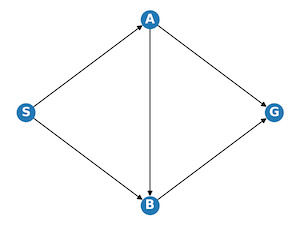

#### **解答例1**
補助量子ビットを使う。

観測回数: 1000回
取得した値: '11001', 取得回数: 28回, S->A 1, A->B 1, S->B 0, A->G 0, B->G 1
取得した値: '10010', 取得回数: 39回, S->A 1, A->B 0, S->B 0, A->G 1, B->G 0
取得した値: '00101', 取得回数: 38回, S->A 0, A->B 0, S->B 1, A->G 0, B->G 1


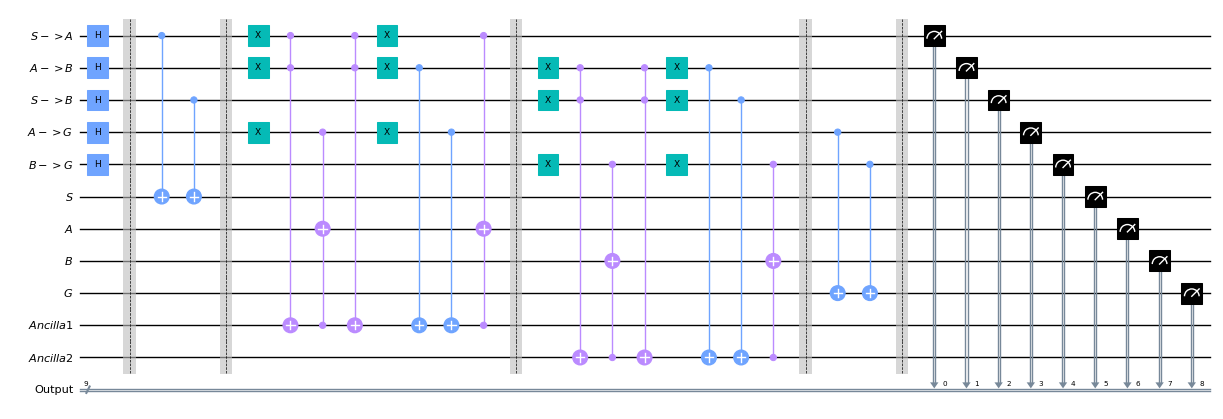

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, AncillaRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qSA = QuantumRegister(1, name="S->A")
qAB = QuantumRegister(1, name="A->B")
qSB = QuantumRegister(1, name="S->B")
qAG = QuantumRegister(1, name="A->G")
qBG = QuantumRegister(1, name="B->G")
qS = QuantumRegister(1, name="S")
qA = QuantumRegister(1, name="A")
qB = QuantumRegister(1, name="B")
qG = QuantumRegister(1, name="G")
qAnc1 = AncillaRegister(1, name="Ancilla1")
qAnc2 = AncillaRegister(1, name="Ancilla2")
c = ClassicalRegister(9, name="Output")
qc = QuantumCircuit(qSA, qAB, qSB, qAG, qBG, qS, qA, qB, qG, qAnc1, qAnc2, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(4)

# nodeS
qc.barrier()
qc.cx(0, 5)
qc.cx(2, 5)

# nodeA
qc.barrier()
qc.x(0)
qc.x(1)
qc.x(3)
qc.ccx(0, 1, 9)
qc.ccx(3, 9, 6)
qc.ccx(0, 1, 9)
qc.x(3)
qc.x(1)
qc.x(0)

qc.cx(1, 9)
qc.cx(3, 9)
qc.ccx(0, 9, 6)

# nodeB
qc.barrier()
qc.x(1)
qc.x(2)
qc.x(4)
qc.ccx(1, 2, 10)
qc.ccx(4, 10, 7)
qc.ccx(1, 2, 10)
qc.x(4)
qc.x(2)
qc.x(1)

qc.cx(1, 10)
qc.cx(2, 10)
qc.ccx(4, 10, 7)

# nodeG
qc.barrier()
qc.cx(3, 8)
qc.cx(4, 8)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    if k[::-1][5:] == '1111':
        print(f"取得した値: '{k[::-1][:5]}', 取得回数: {v}回, S->A {k[::-1][0]}, A->B {k[::-1][1]}, S->B {k[::-1][2]}, A->G {k[::-1][3]}, B->G {k[::-1][4]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", scale=0.5, fold=-1)

#### **解答例2**
qiskitのMCXゲートを使う。

観測回数: 1000回
取得した値: '11001', 取得回数: 24回, S->A 1, A->B 1, S->B 0, A->G 0, B->G 1
取得した値: '00101', 取得回数: 35回, S->A 0, A->B 0, S->B 1, A->G 0, B->G 1
取得した値: '10010', 取得回数: 35回, S->A 1, A->B 0, S->B 0, A->G 1, B->G 0


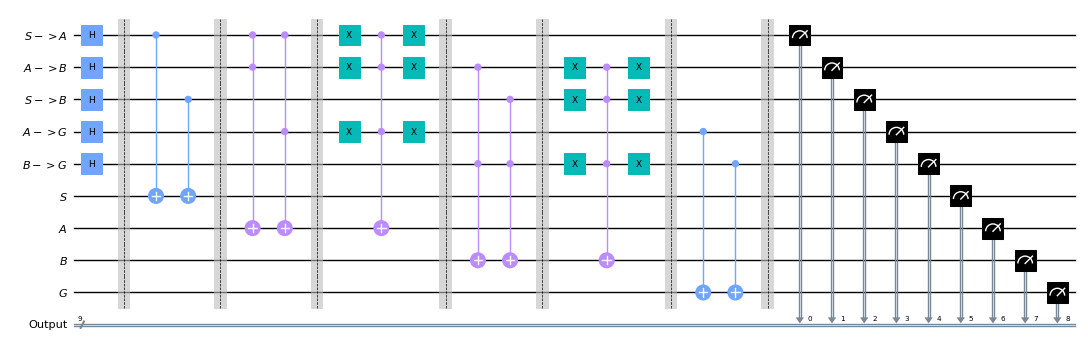

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qSA = QuantumRegister(1, name="S->A")
qAB = QuantumRegister(1, name="A->B")
qSB = QuantumRegister(1, name="S->B")
qAG = QuantumRegister(1, name="A->G")
qBG = QuantumRegister(1, name="B->G")
qS = QuantumRegister(1, name="S")
qA = QuantumRegister(1, name="A")
qB = QuantumRegister(1, name="B")
qG = QuantumRegister(1, name="G")
c = ClassicalRegister(9, name="Output")
qc = QuantumCircuit(qSA, qAB, qSB, qAG, qBG, qS, qA, qB, qG, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(4)

# nodeS
qc.barrier()
qc.cx(0, 5)
qc.cx(2, 5)

# nodeA
qc.barrier()
qc.ccx(0, 1, 6)
qc.ccx(0, 3, 6)

qc.barrier()
qc.x(0)
qc.x(1)
qc.x(3)
qc.mcx([0, 1, 3], 6)
qc.x(3)
qc.x(1)
qc.x(0)

# nodeB
qc.barrier()
qc.ccx(1, 4, 7)
qc.ccx(2, 4, 7)

qc.barrier()
qc.x(1)
qc.x(2)
qc.x(4)
qc.mcx([1, 2, 4], 7)
qc.x(4)
qc.x(2)
qc.x(1)

# nodeG
qc.barrier()
qc.cx(3, 8)
qc.cx(4, 8)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    if k[::-1][5:] == '1111':
        print(f"取得した値: '{k[::-1][:5]}', 取得回数: {v}回, S->A {k[::-1][0]}, A->B {k[::-1][1]}, S->B {k[::-1][2]}, A->G {k[::-1][3]}, B->G {k[::-1][4]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", scale=0.5, fold=-1)

### **演習2**
3 量子ビットを色分け (0: 黒, 1: 白) することを考える場合に、q_0 と q_1、q_1 と q_2 の間の「エッジ」を考える。エッジの両端が異なる色ならエッジはカットできると呼ぶ。カット可能なエッジ数を数えたい。

また、これを用いて最大のカット数となる色の塗分けのパターンも求めたい。

#### **解答例**

観測回数: 1000回
取得した値: '01', 取得回数: 1000回, 切る本数: 2本


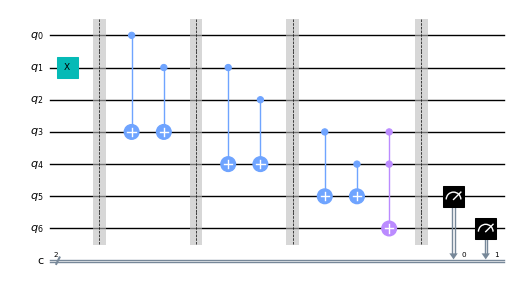

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, AncillaRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qc = QuantumCircuit(7, 2)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.x(1)

# nodeS
qc.barrier()
qc.cx(0, 3)
qc.cx(1, 3)

# nodeA
qc.barrier()
qc.cx(1, 4)
qc.cx(2, 4)

# nodeB
qc.barrier()
qc.cx(3, 5)
qc.cx(4, 5)
qc.ccx(3, 4, 6)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([5, 6], [0, 1])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: '{k[::-1]}', 取得回数: {v}回, 切る本数: {int(k, 2)}本")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", scale=0.5, fold=-1)

## **参考文献 & ツール**


*   [IBM Quantumで学ぶ量子コンピュータ](https://amzn.asia/d/16wLqBQ)
*   [Qiskit (Version-0.45.0)](https://qiskit.org/)
*   [IBM Quantum (IBM社)](https://quantum-computing.ibm.com/)
*   [Qplat (DEVEL社)](http://qplat-education.devel-q.com/)

## **その他**
著者: 比嘉恵一朗（DEVEL株式会社）、外林俊介\
この講座内容の著作権は全て[一般社団法人日本量子コンピューティング協会](https://www.jqca.org/)に帰属しています。